# Abalone Summary 

#### Point of Caution: I hit run all while typing this up. It is still going. I left this all in here so my thought process and work could be assessed. I would never put this in front of a board. I would show this to my manager to explain what I did and what paths I explored. 

#### While going through this dataset I built the Result class to help me assess the predictive value of the models I made. My next goals are to work with the sklearn.metrics library and incorporate the two. If you can get precision and recall I bet you can get the AOC of the P/R curve.

#### The primary goal of this is not to get the right answer. Abalone have rings. Predicting weight by age and telling abalone farmers what the best age to harvest at would probably be more useful information. This is about building the process.

#### Right now the process is struggling with implementation and common problems. But at this point I can pretty confidently clean up data and apply models. 

#### Lots of models. 

#### I did the same thing with this dataset. I did many variations with basic linear and logistic regressors then I moved to SVMs and ran many variations of those.  I found a radial basis function kernel that had a mean absolute error of 1.5 and a ploynomial kernal with an MAE of 1.51. i.e. the predicted age was wrong by 1.5 years on average. 

#### To get an F-Score and a precision/recall score you need to determine what a "correct" classification is and turn this into a yes or no question. MAE or MSE seem like better measures. 

#### I was asked to explain how the radial basis function kernel worked:

#### With 2 or 3 or maybe 4 features I can somewhat visually explain how these work. After that I can only approximate it. I was asked to describe the radial basis function kernel so I will start with the 2d adaptation. 

#### As I understand it you pick a point on the graph and the labels are measured by their distance from that point. When you add a Z axis it becomes a sphere. 

#### After that the 4th feature would turn it into an elipsoid. The 5th and however many more features start adding pimples and dimples to your shape.

#### My main take away from this analysis is that the polynomial kernal I found below was not the best over all, but it was the best at older abalone. 

#### My intuition is that as we move into neural nets we will explore the idea that you split the dataset up by pushing it through a series of these classifiers.

Enter           enter edit mode                 Shift-­Enter     run cell, select below
Ctrl-Enter      run cell                        Alt-Enter       run cell, insert below
Y               to code                         M               to markdown
R               to raw                          1               to heading 1
2,3,4,5,6       to heading 2,3,4,5,6            Up/K            select cell above
Down/J          select cell below               A/B             insert cell above/­below
X               cut selected cell               C               copy selected cell
Shift-V         paste cell above                V               paste cell below
Z               undo last cell deletion         D,D             delete selected cell
Shift-M         merge cell below                Ctrl-S          Save and Checkpoint
L               toggle line numbers             O               toggle output
Shift-O         toggle output scrolling         Esc             close pager
H               show keyboard shortcut help     I,I             interrupt kernel
0,0             restart kernel                  Space           scroll down
Shift-­Space     scroll up                       Shift           ignore

Edit Mode (press Enter to enable)
Tab                 code completion or indent   Shift-Tab           tooltip
Ctrl-]              indent                      Ctrl-[              dedent
Ctrl-A              select all                  Ctrl-Z              undo
Ctrl-S­hift-Z        redo                        Ctrl-Y              redo
Ctrl-Home           go to cell start            Ctrl-Up             go to cell start
Ctrl-End            go to cell end              Ctrl-Down           go to cell end
Ctrl-Left           go one word left            Ctrl-Right          go one word right
Ctrl-B­ack­space      delete word before          Ctrl-D­elete         delete word after
Esc                 command mode                Ctrl-M              command mode
Shift-­Enter         run cell, select below      Ctrl-Enter          run cell
Alt-Enter           run cell, insert below      Ctrl-S­hif­t-S­ubtract split cell
Ctrl-S­hift--        split cell                  Ctrl-S              Save and Checkpoint
Ctrl-/              toggle comment on current or selected lines

In [53]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import ShuffleSplit
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

path = '/home/collin/machine_learning/CS6140ML18Fall-smith.colin/midterm/data/'
data_file = 'data_abalone.txt' 

In [54]:
data = pd.read_csv(path+data_file, delimiter=',', names=['Sex', 'Length', 'Diameter', 'Height', 'Whole Wt', 'Shucked Wt', 'Viscera Wt', 'Shell Wt', 'Rings'])

This is a very clean dataset. Not much to add or manipulate. 

I am going to try two datasets. One with all of the groups and one with [Length, Shucked Wt, Viscera Wt] removed. Using the correlation table below the weights are all cross correlative though the Shell Weight is actually not that bad so I am leaving it in. Length and Diameter however approach 1. So I am dropping one of those in the second set.

I also need to one hot the Sex column because it is not useful as an object and drop that column afterwords. 

In [55]:
data.corr()

,Length,Diameter,Height,Whole Wt,Shucked Wt,Viscera Wt,Shell Wt,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole Wt,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked Wt,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera Wt,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell Wt,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex           4177 non-null object
Length        4177 non-null float64
Diameter      4177 non-null float64
Height        4177 non-null float64
Whole Wt      4177 non-null float64
Shucked Wt    4177 non-null float64
Viscera Wt    4177 non-null float64
Shell Wt      4177 non-null float64
Rings         4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [57]:
# enc = OneHotEncoder(handle_unknown = 'ignore')
data_dummies = pd.get_dummies(data['Sex'])
data = pd.concat([data, data_dummies], axis=1)
data = data.drop(columns=['Sex'])


I commented these scatter plots out but they gave some insight into their relation to the Rings column.

In [58]:
# names=['Length', 'Diameter', 'Height', 'Whole Wt', 'Shucked Wt', 'Viscera Wt', 'Shell Wt', 'Rings']
# for name in names:
#     data.plot(kind='scatter', x=name, y='Rings')

In [59]:
reg = linear_model.LinearRegression()
log = linear_model.LogisticRegression()

As I continue to look up things everyone already knows I got to StandardScalar. And normalizer. 

In [60]:
data_y = data['Rings']

scaler = StandardScaler()
cols = data.columns.tolist()
dataxX = pd.DataFrame(scaler.fit_transform(data))
dataxX.columns = cols

data1 = data.drop(columns=['Rings'])
data2 = data.drop(columns=['Shucked Wt', 'Viscera Wt', 'Length', 'Rings'])
datax = dataxX.drop(columns=['Rings'])

#### Being senstive to criticism from the other dataset about choosing baseline I am redoing the same assessment on this dataset.

In [61]:
def get_plusmin_23(list):
    pm_2 = 0
    pm_3 = 0
    for i in range(len(hist_y)):
        temp2 = 0
        temp3 = 0
        if(len(hist_y) < 6):
            print ('The list is short. You can figure this out yourself.')
            return 0, 0;
        if i < 2:
            temp2 = sum(hist_y[0:4])
        elif i < 3:
            temp2 = sum(hist_y[i-2:i+2])
            temp3 = sum(hist_y[0:6])
        else:
            temp2 = sum(hist_y[i-2:i+3])
            temp3 = sum(hist_y[i-3:i+4])
        if temp2 > pm_2:
            pm_2 = temp2
        if temp3 > pm_3:
            pm_3 = temp3
    return pm_2, pm_3

In [62]:
hist_y = []
for i in range (30):
    hist_y.append(0)
for i in range (len(data_y)):
    hist_y[data_y[i]] += 1
    
pm_2, pm_3 = get_plusmin_23(hist_y)

print (pm_2/len(data_y))
print (pm_3/len(data_y))

0.6629159683983721
0.7888436677040939


### Given the above array we have 689, 634, 568, 487, 391 as the top 5 years.  We can get 2769 +/-2 years by guessing 9 and including 10, 8, 11, 7 and get 66%.

### We will set that for baseline to judge usefulness.

In [63]:
(689+634+568+487+391) / 4177

0.6629159683983721

In [64]:
x_train, x_test, y_train, y_test = train_test_split(data1, data_y, test_size=0.2, random_state=4)
x2_train, x2_test, y2_train, y2_test = train_test_split(data2, data_y, test_size=0.2, random_state=4)

At this point the data is set up. The answer column was dropped. There are 2 data sets one with all of the columns and another with three columns that had strong cross correlation dropped. I have divided them into two test/training sets.

I have a linear regression model and a logistic regression model set up. Time to fit and predict!

In [65]:
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

reg.fit(x2_train, y2_train)
y2_pred = reg.predict(x2_test)

log.fit(x_train, y_train)
log_y_pred = log.predict(x_test)

log.fit(x2_train, y2_train)
log2_y_pred = log.predict(x2_test)

I wrote a class called Result. I posted the code on Piazza and it is in a .py file right next to this notebook. I am importing it here and created a Result book for each of the regression predictions here. 

In [66]:
from result_lib import Result

lin_one_result = Result(y_pred, y_test.values, 1)
lin_two_result = Result(y2_pred, y2_test.values, 1)

log_one_result = Result(log_y_pred, y_test.values, 1)
log_two_result = Result(log2_y_pred, y2_test.values, 1)


The first tool the class I wrote gave me is a way to see basic numbers. What is the range, the number that are within that range of the predicted value, and most importantly the mean variance, i.e. how far off the guess was.

In [67]:
lin_two_result.display_totals()

Range: 1
Correct: 349
Mean Variance: 1.6071597772168658


In [68]:
lin_one_result.display_totals()

Range: 1
Correct: 371
Mean Variance: 1.5688643029663671


In [69]:
log_one_result.display_totals()

Range: 1
Correct: 517
Mean Variance: 1.686602870813397


In [70]:
log_two_result.display_totals()

Range: 1
Correct: 516
Mean Variance: 1.7141148325358853


While that will eventually be useful this next tool is at the moment the best one for taking next steps. I make a list of the natural values of the variances I plot on the X and I can plot them against the true values which I put on the Y. i.e. For each true value I can show how far off and in which direction the regression erred. 

After taking one look at the graphs the next step is not so obvious. 

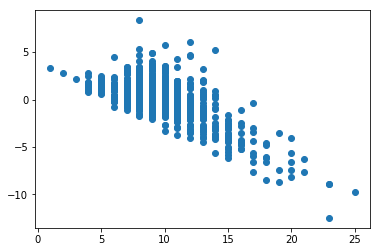

In [71]:
plt.plot(y2_test.values, lin_two_result.list_variances, 'o')

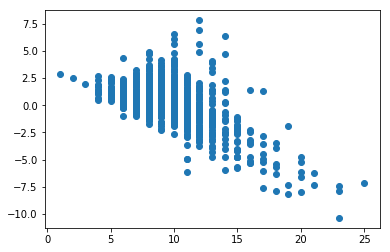

In [72]:
plt.plot(y_test.values, lin_one_result.list_variances, 'o')

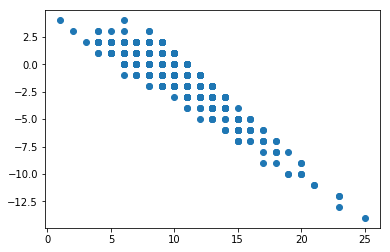

In [73]:
plt.plot(y_test.values, log_one_result.list_variances, 'o')

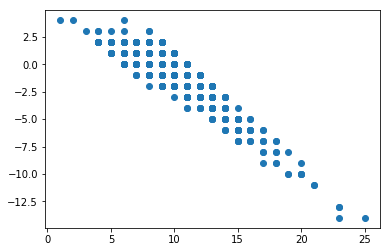

In [74]:
plt.plot(y_test.values, log_two_result.list_variances, 'o')

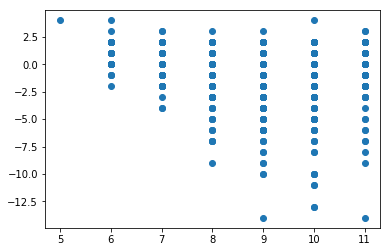

In [75]:
plt.plot(log2_y_pred, log_two_result.list_variances, 'o')

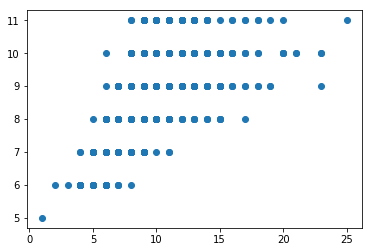

In [76]:
plt.plot(y_test.values, log2_y_pred, 'o')

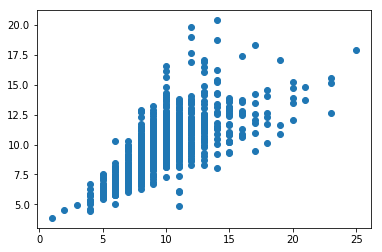

In [77]:
plt.plot(y_test.values, y_pred, 'o')

After looking at the graphs and judging by performance here is the following observation:

Abalone are all very much the same size. 

Deep I know.

The graph just above this is a plot of the predicted values versus the actual values for the second linear regression. At the age of 5 we predict a little low on age. At the age of 7-12 we are very close. After that we predict they are 10 or 11. I think they just stop growing. Looking at the given data everything has to do with size. 

Below I use the get confidence tool and I see linear one drops us from +/-2 to +/-1.67 to get 66%. They both get to 73% at +/-2 so it is slightly better than noise.

Both log regressions get 80% at +/-2 rather than 66%

Judging these Linear Regression using the entire dataset seems to perform the best. 

Below I use the result class to get confidence intervals near +/-2. 

In [78]:
lin_two_result.get_confidence_interval(73)

1.9982497618732893

In [79]:
lin_one_result.get_confidence_interval(73)

1.9383412434271783

In [80]:
log_two_result.get_confidence_interval(80)

2

In [81]:
log_one_result.get_confidence_interval(80)

2

In [82]:
cv_lin2 = cross_val_score(reg, data2, data_y, cv=5)
cv_lin1 = cross_val_score(reg, data1, data_y, cv=5)
# cv_log2 = cross_val_score(log, data2, data_y, cv=5)
# cv_log1 = cross_val_score(log, data1, data_y, cv=5)

This section is going to be about implementing Support Vector Machines. 

Basic first and using the one-to-one .SCV classifier.

In [83]:
svm_lin1 = svm.SVC(kernel='linear', C=1).fit(x_train, y_train)
svm_lin2 = svm.SVC(kernel='linear', C=1).fit(x2_train, y2_train)

In [84]:
svm_lin1.score(x_test, y_test)

0.2583732057416268

In [85]:
svm_lin2.score(x2_test, y2_test)

0.25478468899521534

This makes no sense. So Result.

In [86]:
svm_pred1 = svm_lin1.predict(x_test)
svm_pred2 = svm_lin2.predict(x2_test)

svm1_result = Result(svm_pred1, y_test.values, 1)
svm2_result = Result(svm_pred2, y2_test.values, 1)

In [87]:
svm1_result.display_totals()

Range: 1
Correct: 530
Mean Variance: 1.69377990430622


In [88]:
svm2_result.display_totals()

Range: 1
Correct: 528
Mean Variance: 1.7260765550239234


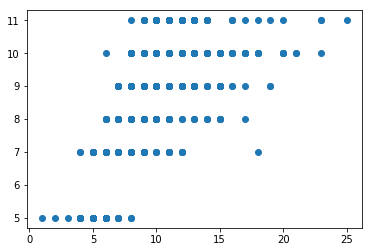

In [89]:
plt.plot(y_test.values, svm_pred1, 'o')

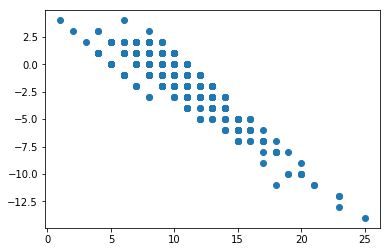

In [90]:
plt.plot(y_test.values, svm1_result.list_variances, 'o')

Same pattern. The predictions guess too high on young specimens and too low on old.

Mostly too low on old. 

There are a lot of SVM options and a variety of ways to format them so I am going to try something a little different. 

In [91]:
x_trains = [x_train, x2_train]
y_trains = [y_train, y2_train]
kernals = ['linear', 'rbf', 'sigmoid']

for krnl in kernals:
    for power in range(-5, 10):
        svm_temp = svm.SVC(kernel=krnl, C=2**power).fit(x_train, y_train)
        y_pred=svm_temp.predict(x_test)
        res_temp = Result(y_pred, y_test.values, 1)
        print('Kernal: ' + krnl + '  C: 2**' + str(power))
        res_temp.display_totals()


Kernal: linear  C: 2**-5
Range: 1
Correct: 502
Mean Variance: 1.8660287081339713
Kernal: linear  C: 2**-4
Range: 1
Correct: 509
Mean Variance: 1.825358851674641
Kernal: linear  C: 2**-3
Range: 1
Correct: 508
Mean Variance: 1.8145933014354068
Kernal: linear  C: 2**-2
Range: 1
Correct: 512
Mean Variance: 1.7787081339712918
Kernal: linear  C: 2**-1
Range: 1
Correct: 528
Mean Variance: 1.708133971291866
Kernal: linear  C: 2**0
Range: 1
Correct: 530
Mean Variance: 1.69377990430622
Kernal: linear  C: 2**1
Range: 1
Correct: 531
Mean Variance: 1.6650717703349283
Kernal: linear  C: 2**2
Range: 1
Correct: 530
Mean Variance: 1.644736842105263
Kernal: linear  C: 2**3
Range: 1
Correct: 531
Mean Variance: 1.6220095693779903
Kernal: linear  C: 2**4
Range: 1
Correct: 535
Mean Variance: 1.605263157894737
Kernal: linear  C: 2**5
Range: 1
Correct: 540
Mean Variance: 1.5921052631578947
Kernal: linear  C: 2**6
Range: 1
Correct: 541
Mean Variance: 1.5837320574162679
Kernal: linear  C: 2**7
Range: 1
Correct:

Looking at the above results a couple things stick out. svm rbf mean variance was still descending at C 2^9 and sigmoid with C 2^-5 looks like a nutball outlier. It was also the best result. The linear SVM bottomed out around C 2^7. 

So.

In [92]:
svm1_sig_n5 = svm.SVC(kernel='sigmoid', C=2**-5).fit(x_train, y_train)
svm2_sig_n5 = svm.SVC(kernel='sigmoid', C=2**-5).fit(x2_train, y2_train)

sig1_n5_pred = svm1_sig_n5.predict(x_test)
sig2_n5_pred = svm2_sig_n5.predict(x2_test)

Classic. The best variance we got was just predicting 9 every time. Turn the error to approach 0 and you get the mean. 

But you have to try. 

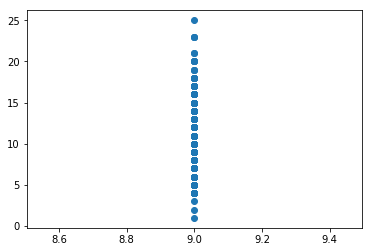

In [93]:
plt.plot(sig1_n5_pred, y_test.values, 'o')

Now for rbf. I want to see what error value approaches the bottom.

In [94]:
for power in range(7, 18):
        svm_temp = svm.SVC(kernel='rbf', C=2**power).fit(x_train, y_train)
        y_pred=svm_temp.predict(x_test)
        res_temp = Result(y_pred, y_test.values, 1)
        print('Kernal: ' + 'rbf' + '  C: 2**' + str(power))
        res_temp.display_totals()

Kernal: rbf  C: 2**7
Range: 1
Correct: 550
Mean Variance: 1.605263157894737
Kernal: rbf  C: 2**8
Range: 1
Correct: 557
Mean Variance: 1.5729665071770336
Kernal: rbf  C: 2**9
Range: 1
Correct: 558
Mean Variance: 1.5358851674641147
Kernal: rbf  C: 2**10
Range: 1
Correct: 559
Mean Variance: 1.5406698564593302
Kernal: rbf  C: 2**11
Range: 1
Correct: 562
Mean Variance: 1.5311004784688995
Kernal: rbf  C: 2**12
Range: 1
Correct: 562
Mean Variance: 1.527511961722488
Kernal: rbf  C: 2**13
Range: 1
Correct: 567
Mean Variance: 1.520334928229665
Kernal: rbf  C: 2**14
Range: 1
Correct: 565
Mean Variance: 1.5107655502392345
Kernal: rbf  C: 2**15
Range: 1
Correct: 572
Mean Variance: 1.5179425837320575
Kernal: rbf  C: 2**16
Range: 1
Correct: 573
Mean Variance: 1.5610047846889952
Kernal: rbf  C: 2**17
Range: 1
Correct: 562
Mean Variance: 1.582535885167464


The numbers are getting ridiculous. I am typing this while I wait. I see the start of a bottom around C 2^14. I might kill this off. I am going to dig into C 2^14. Even if C 2^20 pops up a magical result I don't know if I can explore it. 

It is still running... nm 20 isn't inclusive.

I am goingto try both datasets with it as well. 

I got this result before I ran standard scalar on the data.

In [95]:
rbf14_1 = svm.SVC(kernel='rbf', C=2**14).fit(x_train, y_train)

rbf14_y1_pred = rbf14_1.predict(x_test)

res1_rbf14 = Result(rbf14_y1_pred, y_test.values, 1)

res1_rbf14.display_totals()
    

Range: 1
Correct: 565
Mean Variance: 1.5107655502392345


In [96]:
rbf14_2 = svm.SVC(kernel='rbf', C=2**14).fit(x2_train, y2_train)

rbf14_y2_pred = rbf14_2.predict(x2_test)

res2_rbf14 = Result(rbf14_y2_pred, y2_test.values, 1)

res2_rbf14.display_totals()


Range: 1
Correct: 554
Mean Variance: 1.6423444976076556


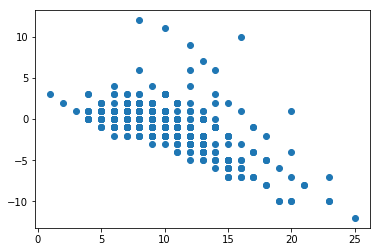

In [97]:
plt.plot(y_test.values, res1_rbf14.list_variances, 'o')

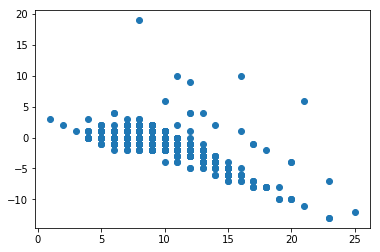

In [98]:
plt.plot(y_test.values, res2_rbf14.list_variances, 'o')

In [99]:
res1_rbf14.get_confidence_interval(84)

2

In [100]:
from sklearn.model_selection import cross_val_predict

cross_pred = cross_val_predict(rbf14_1, data1, data_y, cv=5)


/home/collin/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [101]:
cross_pred

array([ 8,  7, 12, ..., 10,  9, 11])

cross_val_predict is not doing what it says it does in the docs. 

Dataset 2 with the cross correlations pulled out seems to not be as effective. 

Dataset 1 using the rbf kernel just comes closer. It seems to have pulled the predictions on the younger abalone closer to truth but still fails to identify specimens that live past 12 years old. If you give me a variance of 2 this model gives 84%. 

rbf14_1 = svm.SVC(kernel='rbf', C=2^14).fit(x_train, y_train)

2^14 is 16384 so the range of possible C's that may have a better variance is ~8150 to ~32000. Meh.

Now to try poly. The first bunch of stuff here is just trying out all of the options.

In [102]:
poly_1 = svm.SVC(kernel='poly', C=1).fit(x_train, y_train)
poly_1_pred = poly_1.predict(x_test)
res_poly1 = Result(poly_1_pred, y_test.values, 1)
res_poly1.display_totals()

Range: 1
Correct: 480
Mean Variance: 1.9545454545454546


In [103]:
poly_1

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Range: 1
Correct: 506
Mean Variance: 1.8217703349282297


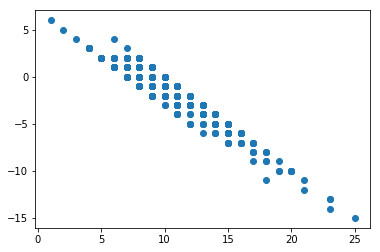

In [104]:
poly_test = svm.SVC(kernel='poly', C=1, degree=1, probability=True, class_weight=None).fit(x_train, y_train)
poly_test_pred = poly_test.predict(x_test)
res_poly_test = Result(poly_test_pred, y_test.values, 1)
res_poly_test.display_totals()
plt.plot(y_test.values, res_poly_test.list_variances, 'o')

So many options!

The next cell might bork my computer. Time to cook something.

As I watch results go by a couple observations. 1 degree polynomials are the best so far. Whatever probability does things are off the rails when it is true. Class Weight doesn't seem to change a lot. 

Variances are still descending at C 2^9. 

1 degree and 2 degree are in possibly usful ranges. My guess is 1 degree is the best fit because we are really just measuring size and guessing age. 

The cell is commented just in case I hit run all cells again. 

In [105]:
for power in range (-5, 10):
    for deg in range(1, 10):
        poly_test1 = svm.SVC(kernel='poly', C=2**power, degree=deg, probability=False, class_weight=None).fit(x_train, y_train)
        poly_test_pred = poly_test1.predict(x_test)
        res_poly_test = Result(poly_test_pred, y_test.values, 1)
        print('Prob: False ClassW: None Power: 2**' + str(power) + ' Degree: ' + str(deg))
        res_poly_test.display_totals()
        
        poly_test2 = svm.SVC(kernel='poly', C=2**power, degree=deg, probability=False, class_weight='balanced').fit(x_train, y_train)
        poly_test_pred = poly_test2.predict(x_test)
        res_poly_test = Result(poly_test_pred, y_test.values, 1)
        print('Prob: False ClassW: balanced Power: 2**' + str(power) + ' Degree: ' + str(deg))
        res_poly_test.display_totals()
        
        poly_test3 = svm.SVC(kernel='poly', C=2**power, degree=deg, probability=True, class_weight=None).fit(x_train, y_train)
        poly_test_pred = poly_test3.predict(x_test)
        res_poly_test = Result(poly_test_pred, y_test.values, 1)
        print('Prob: True ClassW: None Power: 2**' + str(power) + ' Degree: ' + str(deg))
        res_poly_test.display_totals()
        
        poly_test4 = svm.SVC(kernel='poly', C=2**power, degree=deg, probability=True, class_weight='balanced').fit(x_train, y_train)
        poly_test_pred = poly_test4.predict(x_test)
        res_poly_test = Result(poly_test_pred, y_test.values, 1)
        print('Prob: True ClassW: balanced Power: 2**' + str(power) + ' Degree: ' + str(deg))
        res_poly_test.display_totals()

Prob: False ClassW: None Power: 2**-5 Degree: 1
Range: 1
Correct: 412
Mean Variance: 2.199760765550239
Prob: False ClassW: balanced Power: 2**-5 Degree: 1
Range: 1
Correct: 178
Mean Variance: 3.6435406698564594
Prob: True ClassW: None Power: 2**-5 Degree: 1
Range: 1
Correct: 412
Mean Variance: 2.199760765550239
Prob: True ClassW: balanced Power: 2**-5 Degree: 1
Range: 1
Correct: 178
Mean Variance: 3.6435406698564594
Prob: False ClassW: None Power: 2**-5 Degree: 2
Range: 1
Correct: 412
Mean Variance: 2.199760765550239
Prob: False ClassW: balanced Power: 2**-5 Degree: 2
Range: 1
Correct: 162
Mean Variance: 3.7667464114832536
Prob: True ClassW: None Power: 2**-5 Degree: 2
Range: 1
Correct: 412
Mean Variance: 2.199760765550239
Prob: True ClassW: balanced Power: 2**-5 Degree: 2
Range: 1
Correct: 162
Mean Variance: 3.7667464114832536
Prob: False ClassW: None Power: 2**-5 Degree: 3
Range: 1
Correct: 412
Mean Variance: 2.199760765550239
Prob: False ClassW: balanced Power: 2**-5 Degree: 3
Range

Prob: True ClassW: balanced Power: 2**-3 Degree: 2
Range: 1
Correct: 139
Mean Variance: 7.411483253588517
Prob: False ClassW: None Power: 2**-3 Degree: 3
Range: 1
Correct: 416
Mean Variance: 2.1842105263157894
Prob: False ClassW: balanced Power: 2**-3 Degree: 3
Range: 1
Correct: 17
Mean Variance: 6.947368421052632
Prob: True ClassW: None Power: 2**-3 Degree: 3
Range: 1
Correct: 416
Mean Variance: 2.1842105263157894
Prob: True ClassW: balanced Power: 2**-3 Degree: 3
Range: 1
Correct: 17
Mean Variance: 6.947368421052632
Prob: False ClassW: None Power: 2**-3 Degree: 4
Range: 1
Correct: 413
Mean Variance: 2.1961722488038276
Prob: False ClassW: balanced Power: 2**-3 Degree: 4
Range: 1
Correct: 138
Mean Variance: 4.632775119617225
Prob: True ClassW: None Power: 2**-3 Degree: 4
Range: 1
Correct: 413
Mean Variance: 2.1961722488038276
Prob: True ClassW: balanced Power: 2**-3 Degree: 4
Range: 1
Correct: 138
Mean Variance: 4.632775119617225
Prob: False ClassW: None Power: 2**-3 Degree: 5
Range: 1

Prob: True ClassW: None Power: 2**-1 Degree: 4
Range: 1
Correct: 428
Mean Variance: 2.1411483253588517
Prob: True ClassW: balanced Power: 2**-1 Degree: 4
Range: 1
Correct: 17
Mean Variance: 7.2727272727272725
Prob: False ClassW: None Power: 2**-1 Degree: 5
Range: 1
Correct: 421
Mean Variance: 2.166267942583732
Prob: False ClassW: balanced Power: 2**-1 Degree: 5
Range: 1
Correct: 15
Mean Variance: 6.688995215311005
Prob: True ClassW: None Power: 2**-1 Degree: 5
Range: 1
Correct: 421
Mean Variance: 2.166267942583732
Prob: True ClassW: balanced Power: 2**-1 Degree: 5
Range: 1
Correct: 15
Mean Variance: 6.688995215311005
Prob: False ClassW: None Power: 2**-1 Degree: 6
Range: 1
Correct: 419
Mean Variance: 2.1770334928229667
Prob: False ClassW: balanced Power: 2**-1 Degree: 6
Range: 1
Correct: 138
Mean Variance: 4.594497607655502
Prob: True ClassW: None Power: 2**-1 Degree: 6
Range: 1
Correct: 419
Mean Variance: 2.1770334928229667
Prob: True ClassW: balanced Power: 2**-1 Degree: 6
Range: 1
C

Prob: False ClassW: balanced Power: 2**1 Degree: 6
Range: 1
Correct: 16
Mean Variance: 6.782296650717703
Prob: True ClassW: None Power: 2**1 Degree: 6
Range: 1
Correct: 424
Mean Variance: 2.1435406698564594
Prob: True ClassW: balanced Power: 2**1 Degree: 6
Range: 1
Correct: 16
Mean Variance: 6.782296650717703
Prob: False ClassW: None Power: 2**1 Degree: 7
Range: 1
Correct: 422
Mean Variance: 2.160287081339713
Prob: False ClassW: balanced Power: 2**1 Degree: 7
Range: 1
Correct: 17
Mean Variance: 6.681818181818182
Prob: True ClassW: None Power: 2**1 Degree: 7
Range: 1
Correct: 422
Mean Variance: 2.160287081339713
Prob: True ClassW: balanced Power: 2**1 Degree: 7
Range: 1
Correct: 17
Mean Variance: 6.681818181818182
Prob: False ClassW: None Power: 2**1 Degree: 8
Range: 1
Correct: 420
Mean Variance: 2.173444976076555
Prob: False ClassW: balanced Power: 2**1 Degree: 8
Range: 1
Correct: 16
Mean Variance: 6.398325358851674
Prob: True ClassW: None Power: 2**1 Degree: 8
Range: 1
Correct: 420
Me

Prob: False ClassW: balanced Power: 2**3 Degree: 8
Range: 1
Correct: 18
Mean Variance: 6.644736842105263
Prob: True ClassW: None Power: 2**3 Degree: 8
Range: 1
Correct: 425
Mean Variance: 2.1411483253588517
Prob: True ClassW: balanced Power: 2**3 Degree: 8
Range: 1
Correct: 18
Mean Variance: 6.644736842105263
Prob: False ClassW: None Power: 2**3 Degree: 9
Range: 1
Correct: 422
Mean Variance: 2.1578947368421053
Prob: False ClassW: balanced Power: 2**3 Degree: 9
Range: 1
Correct: 17
Mean Variance: 6.6208133971291865
Prob: True ClassW: None Power: 2**3 Degree: 9
Range: 1
Correct: 422
Mean Variance: 2.1578947368421053
Prob: True ClassW: balanced Power: 2**3 Degree: 9
Range: 1
Correct: 17
Mean Variance: 6.6208133971291865
Prob: False ClassW: None Power: 2**4 Degree: 1
Range: 1
Correct: 531
Mean Variance: 1.6722488038277512
Prob: False ClassW: balanced Power: 2**4 Degree: 1
Range: 1
Correct: 387
Mean Variance: 3.376794258373206
Prob: True ClassW: None Power: 2**4 Degree: 1
Range: 1
Correct: 

Prob: False ClassW: None Power: 2**6 Degree: 1
Range: 1
Correct: 536
Mean Variance: 1.6220095693779903
Prob: False ClassW: balanced Power: 2**6 Degree: 1
Range: 1
Correct: 444
Mean Variance: 2.382775119617225
Prob: True ClassW: None Power: 2**6 Degree: 1
Range: 1
Correct: 536
Mean Variance: 1.6220095693779903
Prob: True ClassW: balanced Power: 2**6 Degree: 1
Range: 1
Correct: 444
Mean Variance: 2.382775119617225
Prob: False ClassW: None Power: 2**6 Degree: 2
Range: 1
Correct: 533
Mean Variance: 1.7033492822966507
Prob: False ClassW: balanced Power: 2**6 Degree: 2
Range: 1
Correct: 398
Mean Variance: 2.7547846889952154
Prob: True ClassW: None Power: 2**6 Degree: 2
Range: 1
Correct: 533
Mean Variance: 1.7033492822966507
Prob: True ClassW: balanced Power: 2**6 Degree: 2
Range: 1
Correct: 398
Mean Variance: 2.7547846889952154
Prob: False ClassW: None Power: 2**6 Degree: 3
Range: 1
Correct: 515
Mean Variance: 1.777511961722488
Prob: False ClassW: balanced Power: 2**6 Degree: 3
Range: 1
Corr

KeyboardInterrupt: 

I am hoping a 1 degree polynomial line can beat a linear regression which is the best result so far. I am going to run 1 and 2 degree just to make sure and use both balanced and None for class weight. I will run C's through 19 again.



In [ ]:
for power in range (5, 20):
    for deg in range(1, 3):
        poly_test1 = svm.SVC(kernel='poly', C=2**power, degree=deg, class_weight=None).fit(x_train, y_train)
        poly_test_pred = poly_test1.predict(x_test)
        res_poly_test = Result(poly_test_pred, y_test.values, 1)
        print('ClassW: None Power: 2**' + str(power) + ' Degree: ' + str(deg))
        res_poly_test.display_totals()
        
        poly_test2 = svm.SVC(kernel='poly', C=2**power, degree=deg, class_weight='balanced').fit(x_train, y_train)
        poly_test_pred = poly_test2.predict(x_test)
        res_poly_test = Result(poly_test_pred, y_test.values, 1)
        print('ClassW: balanced Power: 2**' + str(power) + ' Degree: ' + str(deg))
        res_poly_test.display_totals()

The lowest total is around C 2^15 degree 2. For fun I am going to add 100 and subtract 100 from 2^15. 

+100 1.513 
-100 1.514

Seems lucky that in a range between 16000 and 64000 2^15 was really close to the actual minimum. 

In [ ]:
poly1_p15d2 = svm.SVC(kernel='poly', C=2**15, degree=2, class_weight=None).fit(x_train, y_train)
poly1_p15d2_pred=poly1_p15d2.predict(x_test)
res1_polyp15d2 = Result(poly1_p15d2_pred, y_test.values, 1)
res1_polyp15d2.display_totals()
plt.plot(y_test.values, res1_polyp15d2.list_variances, 'o')


In [ ]:
res1_polyp15d2.get_confidence_interval(83)

In [ ]:
poly1_p15d2 = svm.SVC(kernel='poly', C=2**15-100, degree=2, class_weight=None).fit(x_train, y_train)
poly1_p15d2_pred=poly1_p15d2.predict(x_test)
res1_polyp15d2 = Result(poly1_p15d2_pred, y_test.values, 1)
res1_polyp15d2.display_totals
plt.plot(y_test.values, res1_polyp15d2.list_variances, 'o')

#### I accidentally printed out the class weight 'balanced' answer and though it's variance is higher there is something to not about the variances. They don't slope down to the right indicating everything is being pulled to the center, particularly at the older ages. 

#### The problem it seems to have is that it has a tendancy to predict things in the middle ages too high. It is also randomly or probably not randomly the best performing balanced result.

#### This should be exploitable. I don't know how. But he bottom kernel found a way to predict the ages of the oldest abalone fairly effectively. 

#### This is important because if there was money on the line and you had a week to dig into this you would look at this kernel. It did have a tendancy to predict high values on the middle ages and there are a few squirly's in the graph. 

In [ ]:
poly2_p15d2 = svm.SVC(kernel='poly', C=2**15, degree=2, class_weight='balanced').fit(x_train, y_train)
poly2_p15d2_pred=poly2_p15d2.predict(x_test)
res2_polyp15d2 = Result(poly2_p15d2_pred, y_test.values, 1)
res2_polyp15d2.display_totals()
plt.plot(y_test.values, res2_polyp15d2.list_variances, 'o')

## Gradient Boosting Regression

In [ ]:
from funkys_funcs import append_tts

t_sets = []
TEST_DESC = 0
X_TRAIN = 1
Y_TRAIN = 2
X_TEST = 3
Y_TEST = 4

a,b,c,d = train_test_split(data1, data_y, test_size=.2, random_state=17)
D1 = append_tts(a,b,c,d, 'L2 Norm Clip:    ', t_sets)

a,b,c,d = train_test_split(data2, data_y, test_size=.2, random_state=19)
D2 = append_tts(a,b,c,d, 'L2 Norm Clip:    ', t_sets)

a,b,c,d = train_test_split(datax, data_y, test_size=.2, random_state=23)
DX = append_tts(a,b,c,d, 'L2 Norm Clip:    ', t_sets)

In [ ]:
grb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='ls')
y_pred = grb.fit(t_sets[D1][X_TRAIN], t_sets[D1][Y_TRAIN]).predict(t_sets[D1][X_TEST])

res = Result(y_pred, t_sets[D1][Y_TEST].values, .1)

res.display_totals()

In [ ]:
plt.plot(t_sets[D1][Y_TEST], res.list_variances, 'o')

#### The gradient boosting was really bad at guessing the ages of older abalone which is the source of most of the error.  On the other hand the first try came out at MAE 1.75 which is much better than almost everything tried so far. Now that I know how to apply these in a few hours I could run a few hundred variations of this regressor and probably get something as good or better than SVM. 